Pre-visualization of the normalized count data before any differential analysis

# Load

## Libraries and functions

In [ ]:
source("install_libraries.R")

In [157]:
source("load_libraries.R")

Loading required package: SummarizedExperiment
Loading required package: DelayedArray
Loading required package: matrixStats

Attaching package: ‘matrixStats’

The following objects are masked from ‘package:Biobase’:

    anyMissing, rowMedians


Attaching package: ‘DelayedArray’

The following objects are masked from ‘package:matrixStats’:

    colMaxs, colMins, colRanges, rowMaxs, rowMins, rowRanges

The following object is masked from ‘package:base’:

    apply


Attaching package: ‘gplots’

The following object is masked from ‘package:IRanges’:

    space

The following object is masked from ‘package:S4Vectors’:

    space

The following object is masked from ‘package:stats’:

    lowess


Attaching package: ‘plyr’

The following object is masked from ‘package:matrixStats’:

    count

The following object is masked from ‘package:IRanges’:

    desc

The following object is masked from ‘package:S4Vectors’:

    rename

Loading required package: viridisLite


Allowing multi-threading with up to 4 threads.


In [159]:
source("functions.R")

## Data

In [160]:
load("../results/dge/norm_counts.RData")

In [161]:
head(norm_counts)

,GF_104w_F_1_2,GF_104w_F_2_2,GF_104w_F_3_2,GF_104w_M_1_2,GF_104w_M_2_2,GF_52w_M_1_2,GF_52w_M_2_2,GF_52w_M_3_2,GF_52w_M_4_2,GF_8w_M_1_2,⋯,SPF_104w_M_14_2,SPF_8w_F_1_2,SPF_8w_F_3_2,SPF_8w_F_4_2,SPF_8w_F_5_2,GF_8w_F_1_2,GF_8w_F_2_2,GF_8w_F_3_2,GF_8w_F_4_2,GF_8w_F_5_2
0610005C13Rik,0.0000,0.00000,0.0000,1.768593,1.259244,0.8418979,4.942785,5.603216,7.231584,8.47277,⋯,5.28524,3.500355,2.112002,2.602398,0.00000,18.24998,0.00000,2.025447,5.268672,0.00000
Erg28,868.4015,749.64927,910.3535,886.064952,992.913601,508.5063502,530.855142,514.375197,738.344705,603.98749,⋯,692.36648,763.077332,744.480801,908.237050,957.79030,898.54336,682.26034,612.697796,593.252445,809.27852
0610009B22Rik,1021.3276,1169.19730,1180.9991,1224.750457,1558.313990,1038.9020466,876.850113,1016.423320,877.914273,948.95029,⋯,1206.79653,1268.295198,1164.769254,1295.994415,1446.89758,1040.24912,1020.67017,1142.352254,959.952003,1094.00091
0610009L18Rik,28.2185,36.20465,18.2253,20.338816,38.406931,31.9921214,26.691041,22.412863,4.338950,61.73018,⋯,45.80542,42.004257,45.408049,102.794738,72.02239,48.30878,19.58642,11.139960,45.310578,24.36813
0610009O20Rik,217.5555,278.98879,266.0893,226.379868,271.996624,299.7156634,349.949200,395.587025,309.511786,360.69794,⋯,178.81730,274.194454,252.384272,227.709862,184.89330,231.88216,158.86764,271.409933,304.529230,269.33199
0610010B08Rik,0.0000,0.00000,0.0000,0.000000,0.000000,0.0000000,0.000000,0.000000,0.000000,0.00000,⋯,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.00000


# Sample clustering

In [162]:
col_order = colnames(norm_counts)
col_order_metadata = t(sapply(sapply(col_order, strsplit, split = "_"), unlist))
col_order_metadata = col_order_metadata[,c(-4,-5)]
colnames(col_order_metadata) = c("type", "age", "gender")
colors = cbind(col_order_metadata[,3],col_order_metadata[,2],col_order_metadata[,1])
color_SPF = rgb(204,85,79, maxColorValue=255)
color_GF = rgb(107,140,206, maxColorValue=255)
color_104w = rgb(143,98,202, maxColorValue=255)
color_52w = rgb(193,136,63, maxColorValue=255)
color_8w = rgb(74,171,131, maxColorValue=255)
color_F = rgb(126,163,66, maxColorValue=255)
color_M = rgb(199,93,156, maxColorValue=255)
colors[,3] = replace(colors[,3],colors[,3] == "SPF", color_SPF)
colors[,3] = replace(colors[,3],colors[,3] == "GF", color_GF)
colors[,2] = replace(colors[,2],colors[,2] == "104w",color_104w)
colors[,2] = replace(colors[,2],colors[,2] == "52w",color_52w)
colors[,2] = replace(colors[,2],colors[,2] == "8w",color_8w)
colors[,1] = replace(colors[,1],colors[,1] == "F",color_F)
colors[,1] = replace(colors[,1],colors[,1] == "M",color_M)

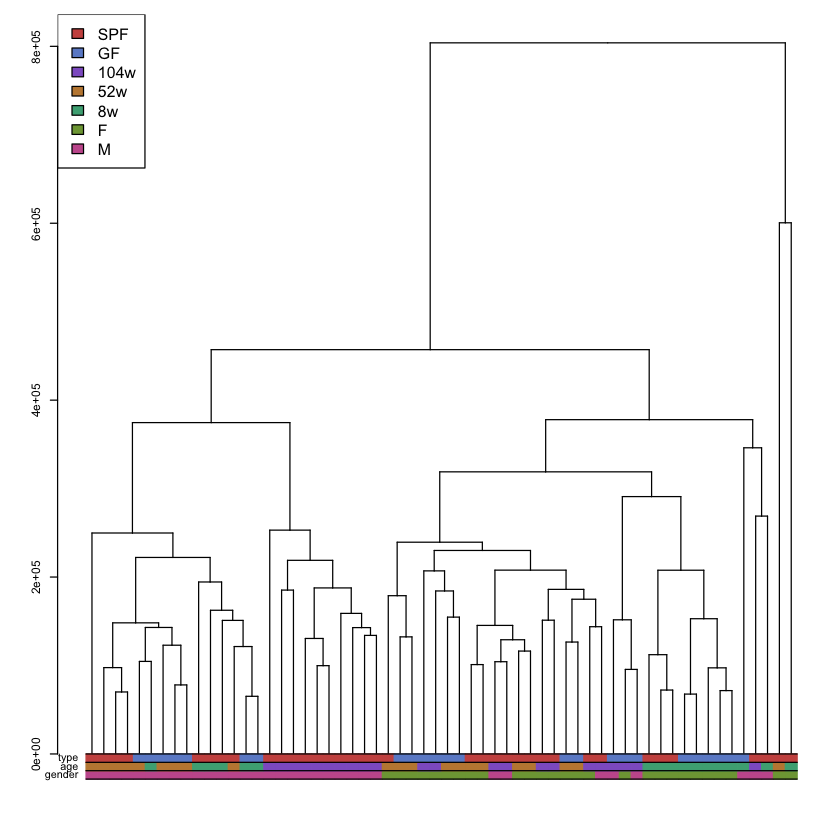

In [163]:
sampleTree = as.dendrogram(hclust(dist(t(norm_counts)), method = "average"))
par(mar = c(4,4,1,1))
par(cex = 0.6)
plot(sampleTree, leaflab="none")
colored_bars(colors, sampleTree, rowLabels = c("gender", "age","type"),y_shift=0.5)
legend("topleft",
        fill=c(color_SPF,color_GF,color_104w,color_52w,color_8w,color_F,color_M),
        c("SPF","GF","104w","52w","8w","F","M"),
        cex=0.8)

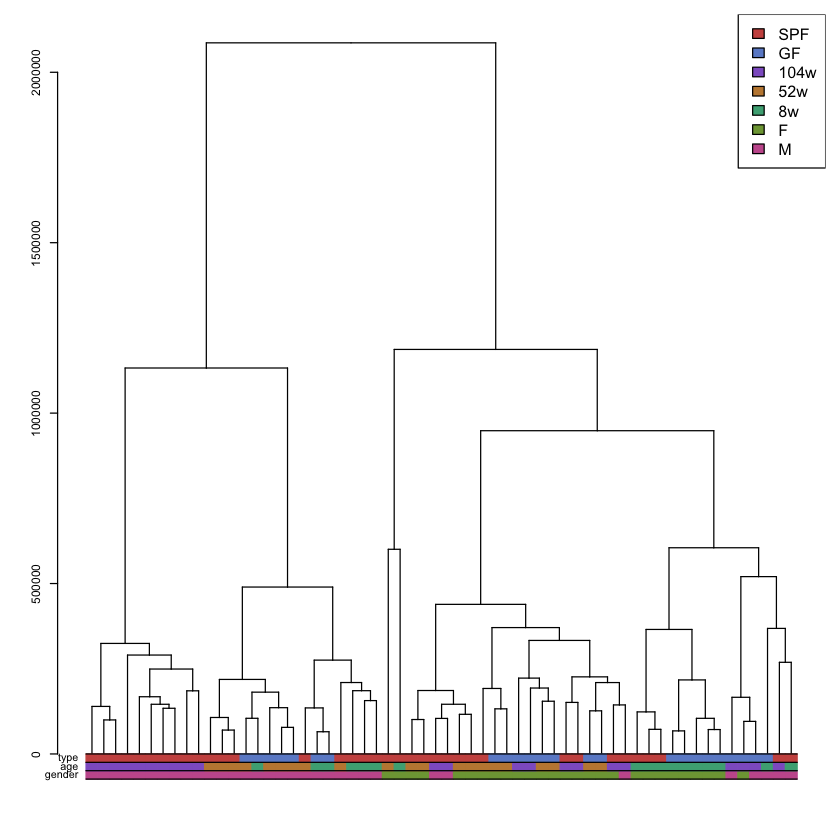

In [164]:
sampleTree = as.dendrogram(hclust(dist(t(norm_counts)), method = "ward.D2"))
par(mar = c(4,4,1,1))
par(cex = 0.6)
plot(sampleTree, leaflab="none")
colored_bars(colors, sampleTree, rowLabels = c("gender", "age","type"),y_shift=0.5)
legend("topright",
        fill=c(color_SPF,color_GF,color_104w,color_52w,color_8w,color_F,color_M),
        c("SPF","GF","104w","52w","8w","F","M"),
        cex=0.8)

# Gene co-expression network analysis


## Build network

In [165]:
# Filter genes that have a count > 10 in more than 90% of the samples
dim(norm_counts)
to_keep = rownames(norm_counts)[which(rowSums(norm_counts > 10)>0.9*dim(norm_counts)[2])]
filtered_norm_counts = norm_counts[to_keep,]
dim(filtered_norm_counts)

[1] 24421    60

[1] 10219    60

pickSoftThreshold: will use block size 4378.
 pickSoftThreshold: calculating connectivity for given powers...
   ..working on genes 1 through 4378 of 10219
   ..working on genes 4379 through 8756 of 10219
   ..working on genes 8757 through 10219 of 10219
   Power SFT.R.sq  slope truncated.R.sq  mean.k. median.k.  max.k.
1      2    0.144 -0.617          0.901 644.0000  6.20e+02 1390.00
2      4    0.691 -1.460          0.964 114.0000  9.21e+01  438.00
3      6    0.783 -1.840          0.970  31.1000  1.94e+01  198.00
4      8    0.790 -2.020          0.962  11.0000  5.03e+00  106.00
5     10    0.832 -1.990          0.985   4.6100  1.49e+00   63.10
6     12    0.851 -1.960          0.988   2.1900  4.90e-01   40.10
7     14    0.876 -1.890          0.988   1.1500  1.72e-01   26.70
8     16    0.886 -1.820          0.971   0.6430  6.43e-02   18.40
9     18    0.899 -1.780          0.970   0.3830  2.50e-02   13.60
10    20    0.882 -1.770          0.946   0.2400  1.02e-02   10.40
11    22

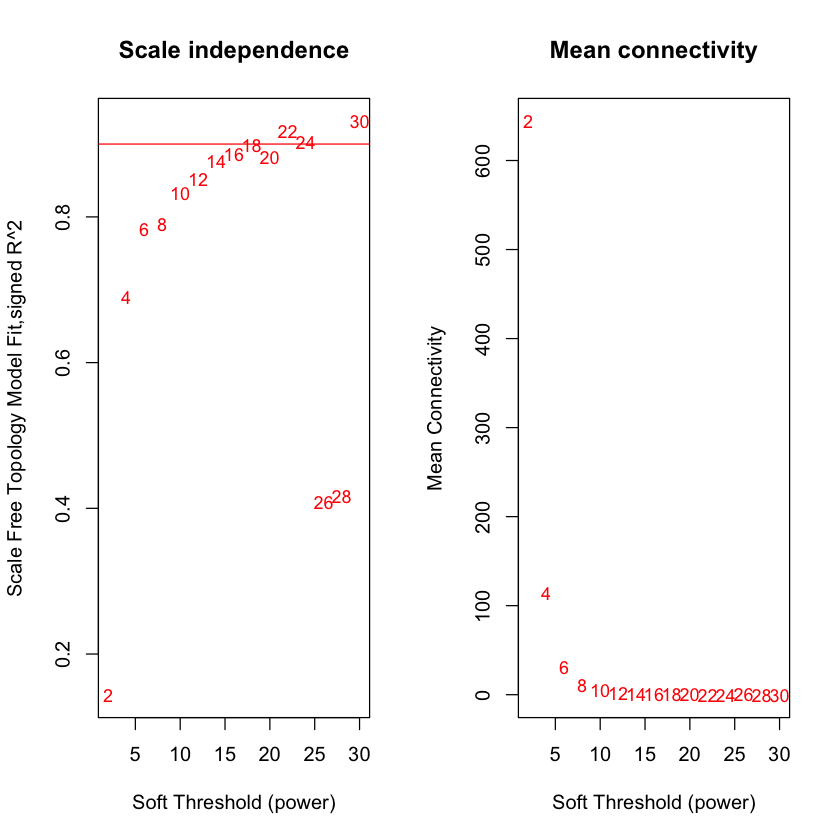

In [13]:
# Choosing the soft-thresholding power
powers = seq(from = 2, to=30, by=2)
sft = pickSoftThreshold(t(filtered_norm_counts), powerVector = powers, verbose = 5)
par(mfrow = c(1,2))
cex1 = 0.9
# Scale-free topology fit index as a function of the soft-thresholding power
plot(sft$fitIndices[,1],
     -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
     xlab="Soft Threshold (power)",
     ylab="Scale Free Topology Model Fit,signed R^2",
     type="n",
     main = paste("Scale independence"))
text(sft$fitIndices[,1],
     -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
     labels=powers,
     cex=cex1,
     col="red");
# this line corresponds to using an R^2 cut-off of h
abline(h=0.90,col="red")
# Mean connectivity as a function of the soft-thresholding power
plot(sft$fitIndices[,1],
     sft$fitIndices[,5],
     xlab="Soft Threshold (power)",
     ylab="Mean Connectivity",
     type="n",
     main = paste("Mean connectivity"))
text(sft$fitIndices[,1], sft$fitIndices[,5], labels=powers, cex=cex1,col="red")

Parameters for network construction
- Soft-thresholding power parameter: 18
- Minimum module size: 30
- Height for module merging: 0.15 (below)
- Biweight Midcorrelation

In [14]:
soft_thresholding_power = 18

In [25]:
head(t(filtered_norm_counts))

,Erg28,0610009B22Rik,0610009L18Rik,0610009O20Rik,0610010F05Rik,0610010K14Rik,Mettl26,0610012G03Rik,0610030E20Rik,0610037L13Rik,⋯,Zw10,Zwint,Zxda,Zxdb,Zxdc,Zyg11b,Zyx,Zzef1,Zzz3,Hikeshi
GF_104w_F_1_2,868.4015,1021.328,28.21850,217.5555,411.4439,1351.757,283.0953,693.6289,899.3508,449.6754,⋯,618.0761,1471.913,297.6596,130.1692,923.9282,1333.552,2864.633,396.8795,752.7967,668.1412
GF_104w_F_2_2,749.6493,1169.197,36.20465,278.9888,461.0769,1516.336,207.6443,686.8236,759.2329,526.0323,⋯,797.5672,1539.763,243.8490,198.0607,981.7850,1340.637,3358.514,364.1762,597.3768,703.8610
GF_104w_F_3_2,910.3535,1180.999,18.22530,266.0893,288.8709,1852.601,222.3486,868.4353,540.3800,444.6972,⋯,731.7456,1375.099,153.0925,171.3178,922.1999,1181.910,3058.205,209.5909,644.2642,770.9300
GF_104w_M_1_2,886.0650,1224.750,20.33882,226.3799,278.5534,1551.056,190.1237,823.2799,525.2720,607.5116,⋯,466.9085,1752.675,172.4378,344.8756,683.5611,1295.494,2789.955,261.7517,944.4285,687.9826
GF_104w_M_2_2,992.9136,1558.314,38.40693,271.9966,304.1073,1911.532,243.0340,778.8422,707.6949,586.8075,⋯,878.3224,1957.494,147.9611,249.3302,1003.6172,1205.726,2819.446,200.8494,785.1384,583.6594
GF_52w_M_1_2,508.5064,1038.902,31.99212,299.7157,392.3244,1173.606,182.6919,589.3286,1047.3210,621.3207,⋯,768.6528,1397.551,287.9291,275.3006,924.4039,1674.535,2206.614,749.2892,1163.5029,493.3522


In [54]:
# Block-wise network construction and module detection
bwnet = blockwiseModules(t(filtered_norm_counts),
                 checkMissingData = TRUE,
                 maxBlockSize = 5000,
                 power = soft_thresholding_power,
                 TOMType = "signed",
                 numericLabels = TRUE,
                 saveTOMs = TRUE,
                 saveTOMFileBase = "norm_genes_TOM",
                 mergeCutHeight = 0.15, 
                 verbose=3,
                 corType="bicor",
                 maxPOutliers=0,
                 minModuleSize = 30)

 Calculating module eigengenes block-wise from all genes
   Flagging genes and samples with too many missing values...
    ..step 1
 ....pre-clustering genes to determine blocks..
   Projective K-means:
   ..k-means clustering..
   ..merging smaller clusters...
Block sizes:
gBlocks
   1    2    3 
4997 4015 1207 
 ..Working on block 1 .
    TOM calculation: adjacency..
    ..will use 4 parallel threads.
     Fraction of slow calculations: 0.000000
    ..connectivity..
    ..matrix multiplication (system BLAS)..
    ..normalization..
    ..done.
   ..saving TOM for block 1 into file norm_genes_TOM-block.1.RData
 ....clustering..
 ....detecting modules..
 ....calculating module eigengenes..
 ....checking kME in modules..
 ..Working on block 2 .
    TOM calculation: adjacency..
    ..will use 4 parallel threads.
     Fraction of slow calculations: 0.000000
    ..connectivity..
    ..matrix multiplication (system BLAS)..
    ..normalization..
    ..done.
   ..saving TOM for block 2 into fi

In [56]:
# Modules
table(bwnet$colors)
module_nb = dim(table(bwnet$colors))-1
module_nb


   0    1    2    3    4    5    6    7    8    9 
9248  343  199  160   54   53   47   40   39   36 

[1] 9

- 9 modules with between 36 and 343 genes 
- 9248 genes not assigned to a module

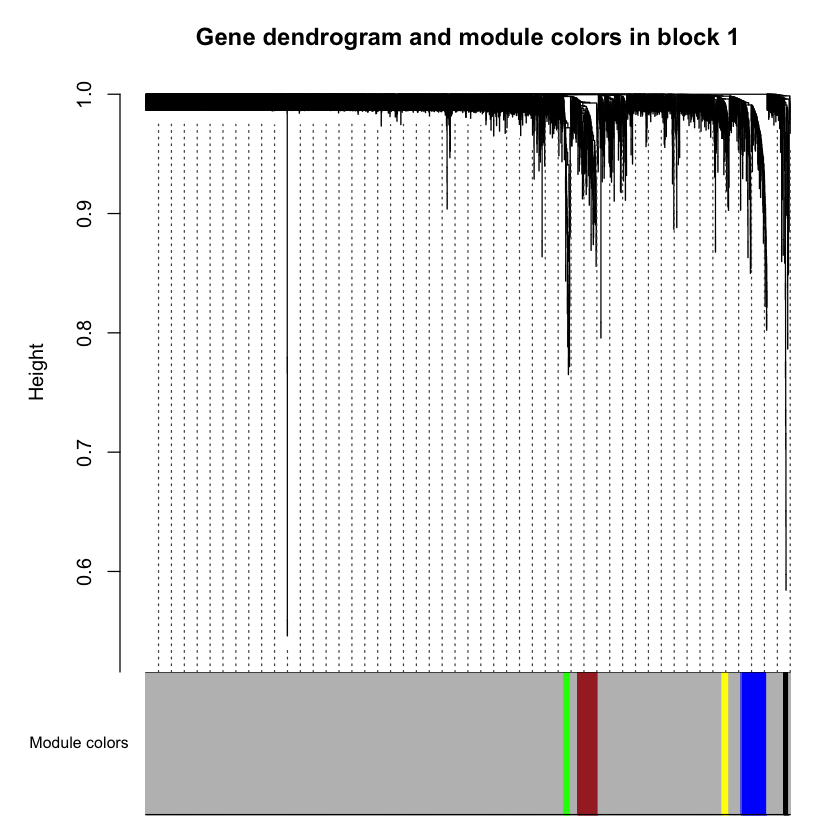

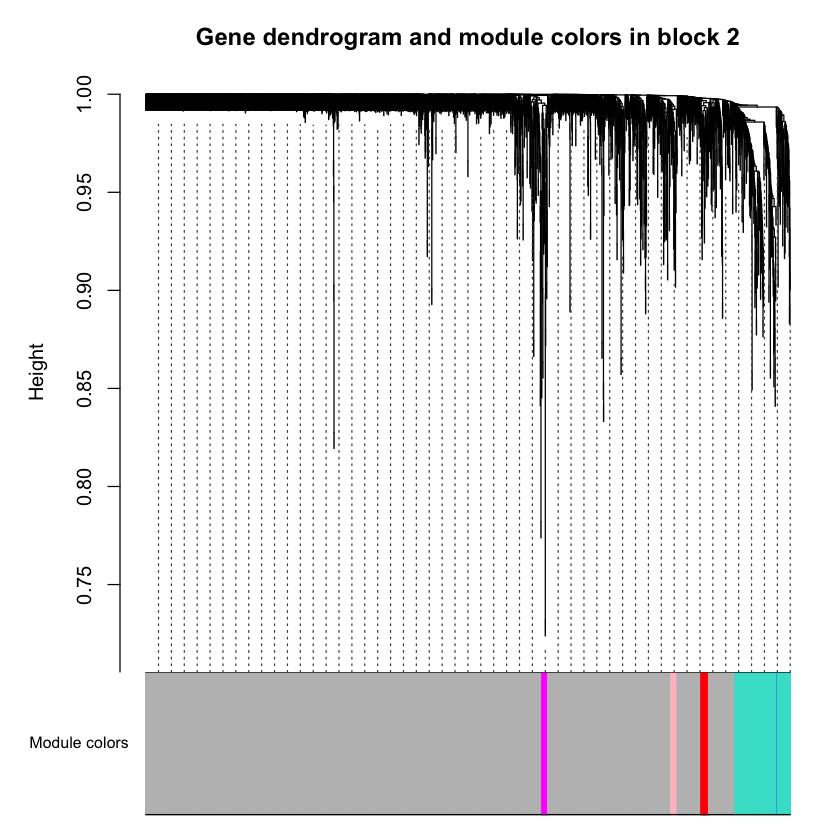

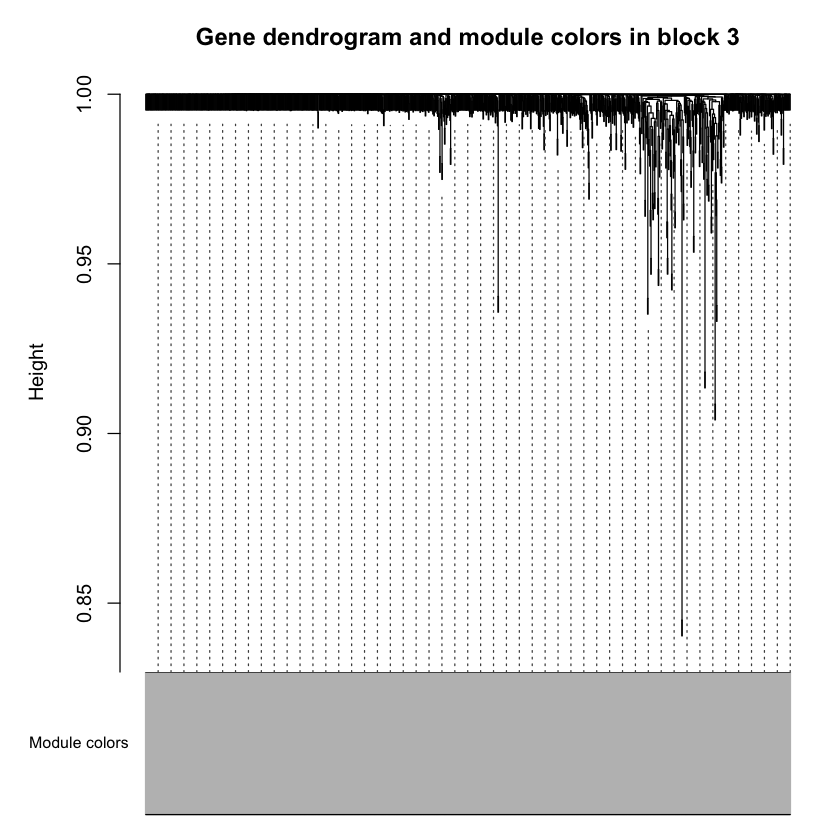

In [57]:
# Plot the dendrogram and the module colors underneath for the 3 blocks
bwModuleColors = labels2colors(bwnet$colors)
plotDendroAndColors(bwnet$dendrograms[[1]],
                    bwModuleColors[bwnet$blockGenes[[1]]],
                    "Module colors",
                    main = "Gene dendrogram and module colors in block 1",
                    dendroLabels = FALSE,
                    hang = 0.03,
                    addGuide = TRUE,
                    guideHang = 0.05)
plotDendroAndColors(bwnet$dendrograms[[2]],
                    bwModuleColors[bwnet$blockGenes[[2]]],
                    "Module colors",
                    main = "Gene dendrogram and module colors in block 2",
                    dendroLabels = FALSE,
                    hang = 0.03,
                    addGuide = TRUE,
                    guideHang = 0.05)
plotDendroAndColors(bwnet$dendrograms[[3]],
                    bwModuleColors[bwnet$blockGenes[[3]]],
                    "Module colors",
                    main = "Gene dendrogram and module colors in block 3",
                    dendroLabels = FALSE,
                    hang = 0.03,
                    addGuide = TRUE,
                    guideHang = 0.05)

In [58]:
# Get genes that are in one module
in_mod = is.finite(match(bwnet$colors, seq(1:module_nb)))
mod_genes = rownames(filtered_norm_counts)[in_mod]
length(mod_genes)

[1] 971

## Network visualization

In [59]:
# Get the Topological Overlap Matrix (TOM)
TOM = TOMsimilarityFromExpr(t(filtered_norm_counts), power = soft_thresholding_power)

TOM calculation: adjacency..
..will use 4 parallel threads.
 Fraction of slow calculations: 0.000000
..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.


In [60]:
# Filter TOM for the genes in the modules
mod_TOM = TOM[in_mod, in_mod]
dimnames(mod_TOM) = list(mod_genes, mod_genes)

In [109]:
# Transform into adjency matrix while keeping gene connection if the value > 0.005
adjency = (as.matrix(mod_TOM)>0.005)*1
head(adjency)

,0610030E20Rik,1600020E01Rik,1700094D03Rik,Lrmda,1810026B05Rik,2010107E04Rik,2410002F23Rik,2410015M20Rik,2510009E07Rik,2610005L07Rik,⋯,Zfp771,Zfp871,Zfp950,Zmpste24,Zmym6,Znrd1,Znrf1,Znrf2,Zscan26,Zswim8
0610030E20Rik,1,0,0,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1600020E01Rik,0,1,1,0,1,0,1,0,0,0,⋯,0,0,0,0,1,0,1,0,1,0
1700094D03Rik,0,1,1,0,1,0,1,0,0,0,⋯,0,0,0,0,1,0,0,0,1,0
Lrmda,0,0,0,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1810026B05Rik,1,1,1,0,1,0,1,0,0,1,⋯,0,0,0,0,1,0,1,0,1,1
2010107E04Rik,0,0,0,0,0,1,0,1,0,0,⋯,0,0,0,0,0,1,0,0,0,0


In [110]:
# Remove the genes only connected to themselves
connected = which(rowSums(adjency)>1)
adjency = adjency[connected,connected]
dim(adjency)
connected_genes = rownames(adjency)

[1] 971 971

In [166]:
# Transform adjency matrix into network
net = graph_from_incidence_matrix(adjency)
save(net, file = "../results/dge/dge_net.RData")

In [167]:
# Get node colors = module color
mod_colors = bwnet$colors
names(mod_colors) = rownames(filtered_norm_counts)
connected_gene_colors = mod_colors[connected_genes]
save(connected_gene_colors, file = "../results/dge/dge_net_connected_gene_colors.RData")

0610030E20Rik 1600020E01Rik 1700094D03Rik         Lrmda 1810026B05Rik 
            1             1             1             7             1 
2010107E04Rik 
            3

In [168]:
pal2 = c("#c15942",
"#7ecf56",
"#844ac1",
"#cdb353",
"#c95393",
"#8cc9ae",
"#4e304c",
"#57623c",
"#9598c3")
save(pal2, file = "../results/dge/dge_net_pal2.RData")

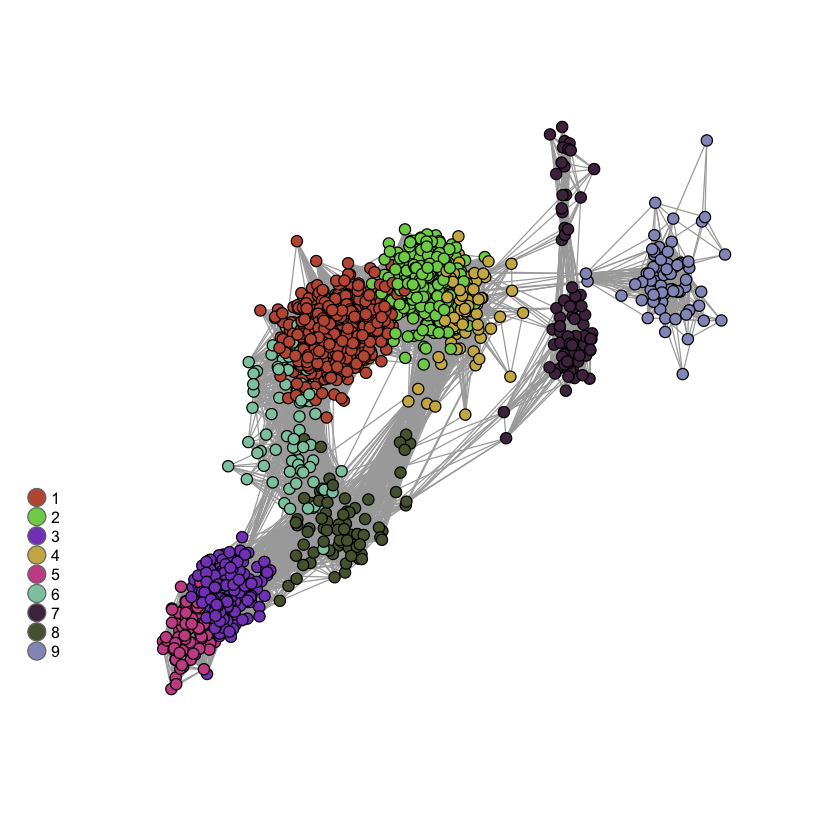

In [114]:
# Plot network
l = layout_with_fr(net)
plot(net, 
     vertex.label=NA,
     vertex.size=4,
     vertex.color=pal2[connected_gene_colors],
     layout=l)
legend(x=-1.5, y=-0.25, 1:module_nb, pch=21,col="#777777", pt.bg=pal2, pt.cex=2, cex=.8, bty="n", ncol=1)

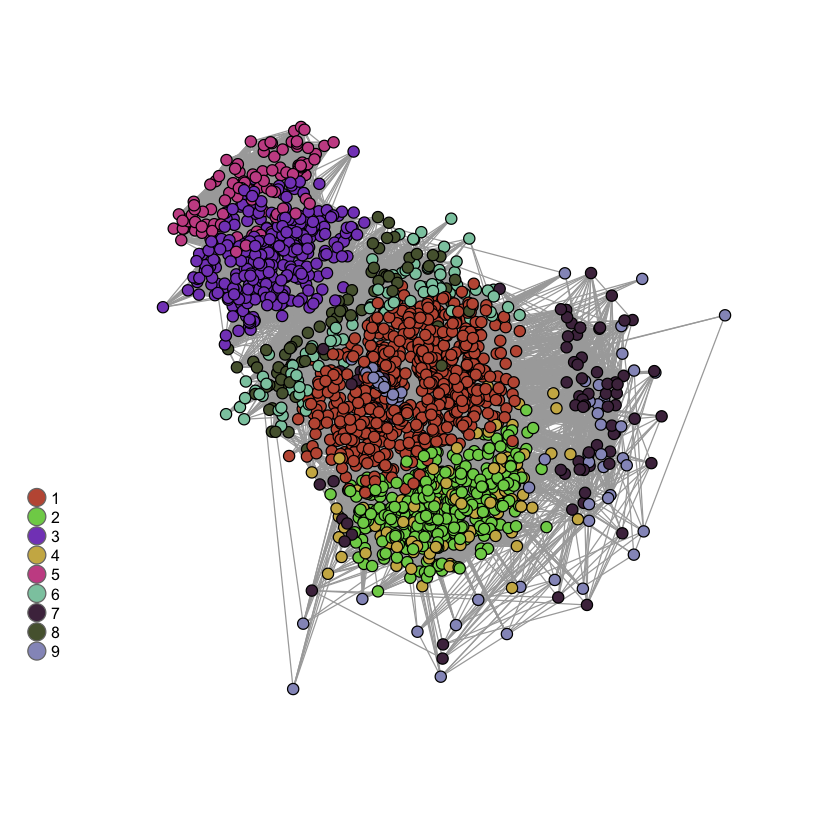

In [115]:
# Plot network
l = layout_with_kk(net)
plot(net, 
     vertex.label=NA,
     vertex.size=4,
     vertex.color=pal2[connected_gene_colors],
     layout=l)
legend(x=-1.5, y=-0.25, 1:module_nb, pch=21,col="#777777", pt.bg=pal2, pt.cex=2, cex=.8, bty="n", ncol=1)

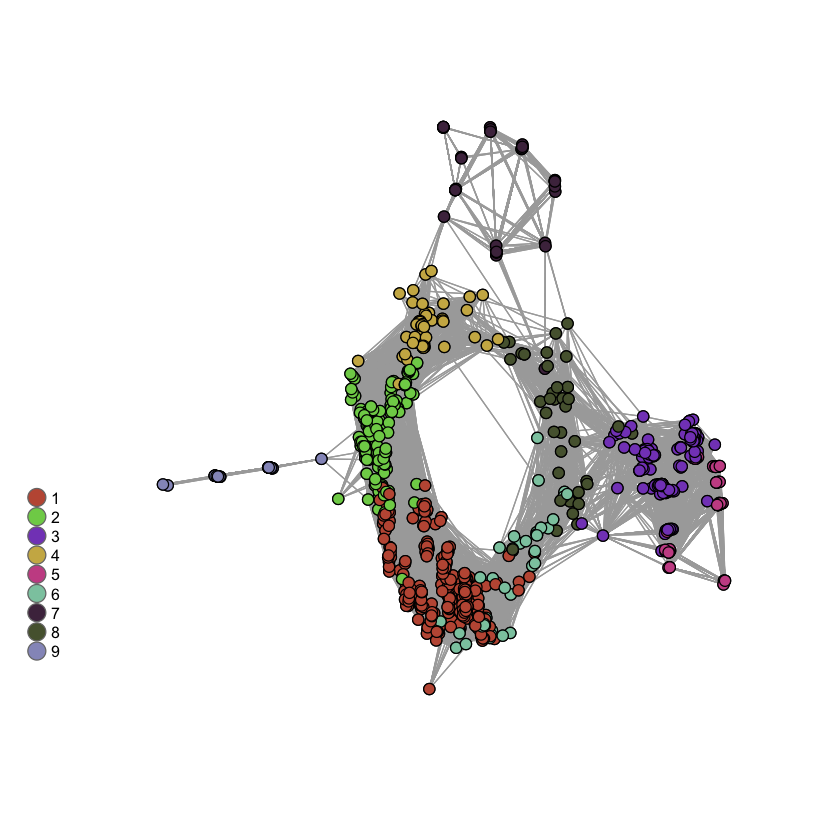

In [116]:
# Plot network
l = layout_with_mds(net)
plot(net, 
     vertex.label=NA,
     vertex.size=4,
     vertex.color=pal2[connected_gene_colors],
     layout=l)
legend(x=-1.5, y=-0.25, 1:module_nb, pch=21,col="#777777", pt.bg=pal2, pt.cex=2, cex=.8, bty="n", ncol=1)

## Module analysis

In [128]:
get_GO_module <- function(module_id){
    module_genes = names(connected_gene_colors)[which(connected_gene_colors == module_id)]
    module_gene_df = bitr(module_genes, fromType = "SYMBOL", toType = c("ENSEMBL", "ENTREZID"), OrgDb = org.Mm.eg.db)
    module_ggo = list()
    #module_ggo$cc = groupGO(gene = module_gene_df[,"ENTREZID"],
    #                        OrgDb = org.Mm.eg.db,
    #                        ont = "CC",
    #                        level = 4,
    #                        readable = FALSE)
    #module_ggo$cc = module_ggo$cc[order(module_ggo$cc$Count,decreasing = TRUE)]
    #module_ggo$mf = groupGO(gene = module_gene_df[,"ENTREZID"],
    #                        OrgDb = org.Mm.eg.db,
    #                        ont = "MF",
    #                        level = 4,
    #                        readable = FALSE)
    #module_ggo$mf = module_ggo$mf[order(module_ggo$mf$Count,decreasing = TRUE)]
    #module_ggo$bp = groupGO(gene = module_gene_df[,"ENTREZID"],
    #                        OrgDb = org.Mm.eg.db,
    #                        ont = "BP",
    #                        level = 4,
    #                        readable = FALSE)
    #module_ggo$bp = module_ggo$bp[order(module_ggo$bp$Count,decreasing = TRUE)]
    module_ggo$cc = enrichGO(gene = module_gene_df[,"ENTREZID"],
                            OrgDb = org.Mm.eg.db,
                            ont = "CC",
                            pAdjustMethod = "BH",
                            pvalueCutoff  = 0.01,
                            qvalueCutoff  = 0.05,
                            readable = FALSE)
    module_ggo$cc = simplify(module_ggo$cc)$Description
    module_ggo$mf = enrichGO(gene = module_gene_df[,"ENTREZID"],
                            OrgDb = org.Mm.eg.db,
                            ont = "MF",
                            pAdjustMethod = "BH",
                            pvalueCutoff  = 0.01,
                            qvalueCutoff  = 0.05,
                            readable = FALSE)
    module_ggo$mf = simplify(module_ggo$mf)$Description
    module_ggo$bp = enrichGO(gene = module_gene_df[,"ENTREZID"],
                            OrgDb = org.Mm.eg.db,
                            ont = "BP",
                            pAdjustMethod = "BH",
                            pvalueCutoff  = 0.01,
                            qvalueCutoff  = 0.05,
                            readable = FALSE)
    module_ggo$bp = simplify(module_ggo$bp)$Description
    return(module_ggo)
}

In [133]:
#for(i in 1:module_nb){
for(i in 1:module_nb){
    print(i)
    module_ggo = get_GO_module(i)
    print("CC")
    print(head(module_ggo$cc))
    print("MF")
    print(head(module_ggo$mf))
    print("BP")
    print(head(module_ggo$bp))
}

[1] 1


'select()' returned 1:many mapping between keys and columns
Warning message in bitr(module_genes, fromType = "SYMBOL", toType = c("ENSEMBL", :
“1.75% of input gene IDs are fail to map...”

[1] "CC"
[1] "nuclear speck"                     "histone methyltransferase complex"
[3] "histone deacetylase complex"       "methyltransferase complex"        
[5] "spliceosomal complex"              "nuclear chromatin"                
[1] "MF"
[1] "helicase activity"                          
[2] "histone-lysine N-methyltransferase activity"
[3] "lysine N-methyltransferase activity"        
[4] "protein-lysine N-methyltransferase activity"
[5] "histone methyltransferase activity"         
[6] "histone binding"                            
[1] "BP"
[1] "histone modification"                     
[2] "histone methylation"                      
[3] "histone lysine methylation"               
[4] "mRNA processing"                          
[5] "regulation of gene expression, epigenetic"
[6] "macromolecule methylation"                
[1] 2


'select()' returned 1:1 mapping between keys and columns
Warning message in bitr(module_genes, fromType = "SYMBOL", toType = c("ENSEMBL", :
“0.5% of input gene IDs are fail to map...”

[1] "CC"
[1] "endoplasmic reticulum subcompartment"                         
[2] "nuclear outer membrane-endoplasmic reticulum membrane network"
[3] "endoplasmic reticulum membrane"                               
[4] "Golgi apparatus part"                                         
[5] "Golgi subcompartment"                                         
[6] "integral component of endoplasmic reticulum membrane"         
[1] "MF"
[1] "GDP binding"                                
[2] "ubiquitin-protein transferase activity"     
[3] "ubiquitin-like protein transferase activity"
[4] "ubiquitin protein ligase activity"          
[5] "ubiquitin-like protein ligase activity"     
[6] "protein disulfide isomerase activity"       
[1] "BP"
[1] "response to endoplasmic reticulum stress"                         
[2] "proteasome-mediated ubiquitin-dependent protein catabolic process"
[3] "proteasomal protein catabolic process"                            
[4] "endoplasmic reticulum tubular network organi

'select()' returned 1:many mapping between keys and columns


[1] "CC"
[1] "mitochondrial membrane part"                 
[2] "inner mitochondrial membrane protein complex"
[3] "mitochondrial protein complex"               
[4] "mitochondrial inner membrane"                
[5] "organelle inner membrane"                    
[6] "mitochondrial respiratory chain"             
[1] "MF"
[1] "hydrogen ion transmembrane transporter activity"               
[2] "electron transfer activity"                                    
[3] "NADH dehydrogenase (ubiquinone) activity"                      
[4] "NADH dehydrogenase (quinone) activity"                         
[5] "NADH dehydrogenase activity"                                   
[6] "monovalent inorganic cation transmembrane transporter activity"
[1] "BP"
[1] "mitochondrial respiratory chain complex assembly"      
[2] "ATP metabolic process"                                 
[3] "purine ribonucleoside triphosphate metabolic process"  
[4] "purine ribonucleoside monophosphate metabolic process" 
[5] "puri

'select()' returned 1:1 mapping between keys and columns


[1] "CC"
character(0)
[1] "MF"
character(0)
[1] "BP"
character(0)
[1] 5


'select()' returned 1:many mapping between keys and columns


[1] "CC"
[1] "cytosolic ribosome"                "ribosomal subunit"                
[3] "ribosome"                          "cytosolic part"                   
[5] "cytosolic small ribosomal subunit" "cytosolic large ribosomal subunit"
[1] "MF"
[1] "structural constituent of ribosome"      
[2] "rRNA binding"                            
[3] "mRNA binding"                            
[4] "translation factor activity, RNA binding"
[5] "translation initiation factor binding"   
[6] "translation initiation factor activity"  
[1] "BP"
[1] "cytoplasmic translation"             
[2] "ribosome biogenesis"                 
[3] "ribonucleoprotein complex biogenesis"
[4] "ribosomal small subunit biogenesis"  
[5] "ribosomal small subunit assembly"    
[6] "ribosome assembly"                   
[1] 6


'select()' returned 1:1 mapping between keys and columns
Warning message in bitr(module_genes, fromType = "SYMBOL", toType = c("ENSEMBL", :
“2.13% of input gene IDs are fail to map...”

[1] "CC"
[1] "chromosomal region"
[1] "MF"
character(0)
[1] "BP"
character(0)
[1] 7


'select()' returned 1:many mapping between keys and columns
Warning message in bitr(module_genes, fromType = "SYMBOL", toType = c("ENSEMBL", :
“2.5% of input gene IDs are fail to map...”

[1] "CC"
character(0)
[1] "MF"
character(0)
[1] "BP"
[1] "adaptive thermogenesis"
[1] 8


'select()' returned 1:many mapping between keys and columns


[1] "CC"
character(0)
[1] "MF"
character(0)
[1] "BP"
character(0)
[1] 9


'select()' returned 1:many mapping between keys and columns


[1] "CC"
[1] "external side of plasma membrane" "MHC protein complex"             
[3] "plasma membrane protein complex" 
[1] "MF"
[1] "peptide antigen binding"      "peptide binding"             
[3] "amide binding"                "extracellular matrix binding"
[5] "TAP binding"                  "antigen binding"             
[1] "BP"
[1] "leukocyte mediated immunity"                                     
[2] "antigen processing and presentation of exogenous peptide antigen"
[3] "regulation of immune effector process"                           
[4] "antigen processing and presentation of peptide antigen"          
[5] "antigen processing and presentation of exogenous antigen"        
[6] "negative regulation of immune system process"                    


In [142]:
all_genes = rownames(norm_counts)

0610005C13Rik         Erg28 0610009B22Rik 0610009L18Rik 0610009O20Rik 
        FALSE         FALSE         FALSE         FALSE         FALSE 
0610010B08Rik 
        FALSE

Can't find mm10/geneSymbol length data in genLenDataBase...
Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Found the annotaion package, TxDb.Mmusculus.UCSC.mm10.knownGene
Trying to get the gene lengths from it.
Warning message in pcls(G):
“initial point very close to some inequality constraints”Fetching GO annotations...
For 2874 genes, we could not find any categories. These genes will be excluded.
To force their use, please run with use_genes_without_cat=TRUE (see documentation).
This was the default behavior for version 1.15.1 and earlier.
Calculating the p-values...
'select()' returned 1:1 mapping between keys and columns


In [151]:
for(i in 1:module_nb){
    print(i)
    module_genes = names(connected_gene_colors)[which(connected_gene_colors == i)]
    module_gene_bool = all_genes %in% module_genes
    names(module_gene_bool) = all_genes
    head(module_gene_bool)
    pwf = nullp(module_gene_bool, 'mm10', 'geneSymbol', plot.fit=F)                         
    GO_wall = goseq(pwf,'mm10', 'geneSymbol')
    adj_GO_wall = GO_wall[p.adjust(GO_wall[,"over_represented_pvalue"],method="BH")<.05,]
    print(head(adj_GO_wall))
    print(head(adj_GO_wall[adj_GO_wall$ontology == "BP",]))
}

[1] 1


Can't find mm10/geneSymbol length data in genLenDataBase...
Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Found the annotaion package, TxDb.Mmusculus.UCSC.mm10.knownGene
Trying to get the gene lengths from it.
Warning message in pcls(G):
“initial point very close to some inequality constraints”Fetching GO annotations...
For 2874 genes, we could not find any categories. These genes will be excluded.
To force their use, please run with use_genes_without_cat=TRUE (see documentation).
This was the default behavior for version 1.15.1 and earlier.
Calculating the p-values...
'select()' returned 1:1 mapping between keys and columns


        category over_represented_pvalue under_represented_pvalue numDEInCat
11744 GO:0044428            1.571760e-15                        1        129
11757 GO:0044446            1.655681e-15                        1        185
3148  GO:0006325            4.973108e-15                        1         49
2741  GO:0005634            2.152264e-14                        1        181
2751  GO:0005654            2.205337e-14                        1         99
17528 GO:0090304            2.633699e-14                        1        145
      numInCat                           term ontology
11744     3692                   nuclear part       CC
11757     6649   intracellular organelle part       CC
3148       723         chromatin organization       BP
2741      6494                        nucleus       CC
2751      2384                    nucleoplasm       CC
17528     4471 nucleic acid metabolic process       BP
        category over_represented_pvalue under_represented_pvalue numDEInCat

Can't find mm10/geneSymbol length data in genLenDataBase...
Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Found the annotaion package, TxDb.Mmusculus.UCSC.mm10.knownGene
Trying to get the gene lengths from it.
Warning message in pcls(G):
“initial point very close to some inequality constraints”Fetching GO annotations...
For 2874 genes, we could not find any categories. These genes will be excluded.
To force their use, please run with use_genes_without_cat=TRUE (see documentation).
This was the default behavior for version 1.15.1 and earlier.
Calculating the p-values...
'select()' returned 1:1 mapping between keys and columns


        category over_represented_pvalue under_represented_pvalue numDEInCat
5178  GO:0012505            1.894056e-19                        1         95
8223  GO:0031984            2.363460e-19                        1         44
18199 GO:0098827            8.158245e-16                        1         30
10678 GO:0042175            9.673792e-16                        1         30
11748 GO:0044432            1.438229e-15                        1         32
11755 GO:0044444            1.873292e-15                        1        135
      numInCat                                                          term
5178      3583                                           endomembrane system
8223       802                                      organelle subcompartment
18199      456                          endoplasmic reticulum subcompartment
10678      462 nuclear outer membrane-endoplasmic reticulum membrane network
11748      541                                    endoplasmic reticulum part

Can't find mm10/geneSymbol length data in genLenDataBase...
Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Found the annotaion package, TxDb.Mmusculus.UCSC.mm10.knownGene
Trying to get the gene lengths from it.
Fetching GO annotations...
For 2874 genes, we could not find any categories. These genes will be excluded.
To force their use, please run with use_genes_without_cat=TRUE (see documentation).
This was the default behavior for version 1.15.1 and earlier.
Calculating the p-values...
'select()' returned 1:1 mapping between keys and columns


        category over_represented_pvalue under_represented_pvalue numDEInCat
2801  GO:0005743            3.032756e-56                        1         60
11766 GO:0044455            3.223406e-56                        1         51
6727  GO:0019866            4.713222e-55                        1         60
2798  GO:0005740            5.717446e-53                        1         64
8214  GO:0031966            5.916241e-53                        1         62
11745 GO:0044429            1.930184e-50                        1         68
      numInCat                         term ontology
2801       401 mitochondrial inner membrane       CC
11766      185  mitochondrial membrane part       CC
6727       442     organelle inner membrane       CC
2798       606       mitochondrial envelope       CC
8214       565       mitochondrial membrane       CC
11745      784           mitochondrial part       CC
        category over_represented_pvalue under_represented_pvalue numDEInCat
12412 GO:0046

Can't find mm10/geneSymbol length data in genLenDataBase...
Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Found the annotaion package, TxDb.Mmusculus.UCSC.mm10.knownGene
Trying to get the gene lengths from it.
Warning message in pcls(G):
“initial point very close to some inequality constraints”Fetching GO annotations...
For 2874 genes, we could not find any categories. These genes will be excluded.
To force their use, please run with use_genes_without_cat=TRUE (see documentation).
This was the default behavior for version 1.15.1 and earlier.
Calculating the p-values...
'select()' returned 1:1 mapping between keys and columns


[1] category                 over_represented_pvalue  under_represented_pvalue
[4] numDEInCat               numInCat                 term                    
[7] ontology                
<0 rows> (or 0-length row.names)
[1] category                 over_represented_pvalue  under_represented_pvalue
[4] numDEInCat               numInCat                 term                    
[7] ontology                
<0 rows> (or 0-length row.names)
[1] 5


Can't find mm10/geneSymbol length data in genLenDataBase...
Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Found the annotaion package, TxDb.Mmusculus.UCSC.mm10.knownGene
Trying to get the gene lengths from it.
Fetching GO annotations...
For 2874 genes, we could not find any categories. These genes will be excluded.
To force their use, please run with use_genes_without_cat=TRUE (see documentation).
This was the default behavior for version 1.15.1 and earlier.
Calculating the p-values...
'select()' returned 1:1 mapping between keys and columns


       category over_represented_pvalue under_represented_pvalue numDEInCat
15   GO:0000028                       0                        1          7
958  GO:0002181                       0                        1         13
1665 GO:0003676                       0                        1         41
1688 GO:0003723                       0                        1         41
1693 GO:0003729                       0                        1         12
1695 GO:0003735                       0                        1         38
     numInCat                               term ontology
15         19   ribosomal small subunit assembly       BP
958        58            cytoplasmic translation       BP
1665     3418               nucleic acid binding       MF
1688     1569                        RNA binding       MF
1693      213                       mRNA binding       MF
1695      147 structural constituent of ribosome       MF
       category over_represented_pvalue under_represented_pval

Can't find mm10/geneSymbol length data in genLenDataBase...
Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Found the annotaion package, TxDb.Mmusculus.UCSC.mm10.knownGene
Trying to get the gene lengths from it.
Warning message in pcls(G):
“initial point very close to some inequality constraints”Fetching GO annotations...
For 2874 genes, we could not find any categories. These genes will be excluded.
To force their use, please run with use_genes_without_cat=TRUE (see documentation).
This was the default behavior for version 1.15.1 and earlier.
Calculating the p-values...
'select()' returned 1:1 mapping between keys and columns


[1] category                 over_represented_pvalue  under_represented_pvalue
[4] numDEInCat               numInCat                 term                    
[7] ontology                
<0 rows> (or 0-length row.names)
[1] category                 over_represented_pvalue  under_represented_pvalue
[4] numDEInCat               numInCat                 term                    
[7] ontology                
<0 rows> (or 0-length row.names)
[1] 7


Can't find mm10/geneSymbol length data in genLenDataBase...
Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Found the annotaion package, TxDb.Mmusculus.UCSC.mm10.knownGene
Trying to get the gene lengths from it.
Warning message in pcls(G):
“initial point very close to some inequality constraints”Fetching GO annotations...
For 2874 genes, we could not find any categories. These genes will be excluded.
To force their use, please run with use_genes_without_cat=TRUE (see documentation).
This was the default behavior for version 1.15.1 and earlier.
Calculating the p-values...
'select()' returned 1:1 mapping between keys and columns


[1] category                 over_represented_pvalue  under_represented_pvalue
[4] numDEInCat               numInCat                 term                    
[7] ontology                
<0 rows> (or 0-length row.names)
[1] category                 over_represented_pvalue  under_represented_pvalue
[4] numDEInCat               numInCat                 term                    
[7] ontology                
<0 rows> (or 0-length row.names)
[1] 8


Can't find mm10/geneSymbol length data in genLenDataBase...
Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Found the annotaion package, TxDb.Mmusculus.UCSC.mm10.knownGene
Trying to get the gene lengths from it.
Warning message in pcls(G):
“initial point very close to some inequality constraints”Fetching GO annotations...
For 2874 genes, we could not find any categories. These genes will be excluded.
To force their use, please run with use_genes_without_cat=TRUE (see documentation).
This was the default behavior for version 1.15.1 and earlier.
Calculating the p-values...
'select()' returned 1:1 mapping between keys and columns


[1] category                 over_represented_pvalue  under_represented_pvalue
[4] numDEInCat               numInCat                 term                    
[7] ontology                
<0 rows> (or 0-length row.names)
[1] category                 over_represented_pvalue  under_represented_pvalue
[4] numDEInCat               numInCat                 term                    
[7] ontology                
<0 rows> (or 0-length row.names)
[1] 9


Can't find mm10/geneSymbol length data in genLenDataBase...
Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Found the annotaion package, TxDb.Mmusculus.UCSC.mm10.knownGene
Trying to get the gene lengths from it.
Warning message in pcls(G):
“initial point very close to some inequality constraints”Fetching GO annotations...
For 2874 genes, we could not find any categories. These genes will be excluded.
To force their use, please run with use_genes_without_cat=TRUE (see documentation).
This was the default behavior for version 1.15.1 and earlier.
Calculating the p-values...
'select()' returned 1:1 mapping between keys and columns


        category over_represented_pvalue under_represented_pvalue numDEInCat
1075  GO:0002376             0.00000e+00                        1         22
3585  GO:0006952             0.00000e+00                        1         16
4698  GO:0009897             0.00000e+00                        1         11
4724  GO:0009986             0.00000e+00                        1         15
18072 GO:0098552             0.00000e+00                        1         12
3588  GO:0006955             9.69754e-11                        1         15
      numInCat                             term ontology
1075      2168            immune system process       BP
3585      1320                 defense response       BP
4698       309 external side of plasma membrane       CC
4724       841                     cell surface       CC
18072      499                 side of membrane       CC
3588      1186                  immune response       BP
        category over_represented_pvalue under_represented_pva

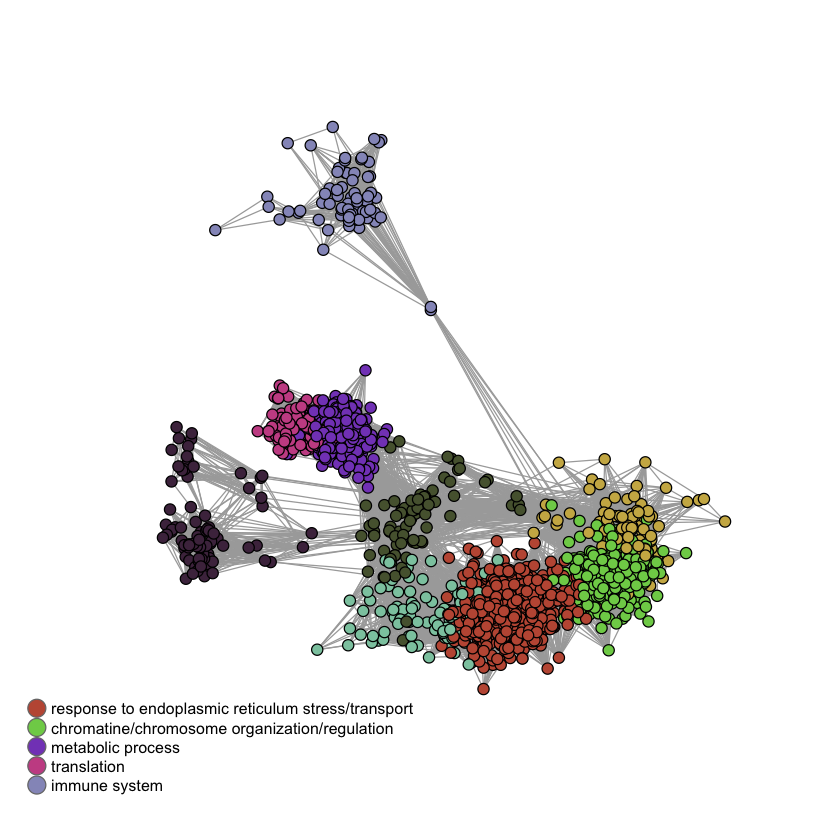

In [156]:
# Plot network
plot_net_with_fr_layout(net, connected_gene_colors, pal2)